In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import scipy
from math import sqrt

In [2]:
#Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model

In [3]:
#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
#Cross validation
from sklearn.model_selection import train_test_split

In [5]:
#data
rawData = pd.read_csv('D:\Cenfotec - Big Data\Data Sciece with Python\default of credit card clients.csv', header=1)
rawData.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
rawData['LIMIT_BAL']= rawData['LIMIT_BAL'].astype('category')
rawData['EDUCATION']= rawData['EDUCATION'].astype('category')
rawData['SEX']= rawData['SEX'].astype('category')
rawData['MARRIAGE']= rawData['MARRIAGE'].astype('category')

In [8]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null category
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6   

In [9]:
rawData.drop(['ID'],axis=1,inplace=True)

In [10]:
rawData['default payment next month']= rawData['default payment next month'].astype('category')

In [11]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null category
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1    

In [12]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0       3102        689          0          0          0         0       689   
1       1725       2682       3272       3455       3261         0      1000   
2      14027      13559      14331      14948      15549      1518      1500   
3      48233      49291      28314      28959      29547      2000      2019   
4       5670      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0         0         0         0  
1      1000      1000         0      2000  
2      1000      1000      1000      5000  
3      1200      1100      1069      1000  
4     10000      9000       689       679

In [13]:
#dependent variable
depVar = rawData['default payment next month']
depVar

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]

In [14]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar)

In [16]:
X_train.shape, X_test.shape

((22500, 11), (7500, 11))

In [17]:
y_train.shape, y_test.shape

((22500,), (7500,))

In [24]:
# Mode=SVlos
modelRF = RandomForestClassifier()
modelSVC = SVC()
modelLR =LogisticRegression()

In [19]:
features = rawData.iloc[:,:22]
print('Summary of features')
features.head()

Summary of features


LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0     20000   2         2        1   24      2      2     -1     -1     -2   
1    120000   2         2        2   26     -1      2      0      0      0   
2     90000   2         2        2   34      0      0      0      0      0   
3     50000   2         2        1   37      0      0      0      0      0   
4     50000   1         2        1   57     -1      0     -1      0      0   

   ...  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0  ...       3102        689          0          0          0         0   
1  ...       1725       2682       3272       3455       3261         0   
2  ...      14027      13559      14331      14948      15549      1518   
3  ...      48233      49291      28314      28959      29547      2000   
4  ...       5670      35835      20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
0       689         0         0         0  
1      1000      1000      1000         0  
2      1500      1000      1000      1000  
3      2019      1200      1100      1069  
4     36681     10000      9000       689  

[5 rows x 22 columns]

In [20]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


In [34]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF,X_train,y_train))
modelRF.score(X_train,y_train)

[0.77822222 0.77533333 0.78888889 0.78355556 0.78911111]


0.9848

In [25]:
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC,X_train,y_train))
modelSVC.score(X_train,y_train)

[0.77711111 0.77711111 0.77711111 0.77733333 0.77733333]


0.7774222222222222

In [26]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR,X_train,y_train))
modelLR.score(X_train,y_train)

[0.77844444 0.77911111 0.78111111 0.78044444 0.78133333]


0.7803111111111111

In [49]:
predictions = modelSVC.predict(X_test)
score = modelSVC.score(X_test,y_test)
print(score)

0.7837333333333333


In [42]:
#predRsquared =r2_score(y_test,predictions)
#rmse=sqrt(mean_squared_error(y_test,predictions))
#print('R Squared: %.3f' % predRsquared)
#print('RMSE: %.3f' % rmse)

R Squared: -0.275
RMSE: 0.465


In [50]:
predictions = modelLR.predict(X_test)
score = modelLR.score(X_test,y_test)
print(score)

0.7865333333333333


In [44]:
#predRsquared =r2_score(y_test,predictions)
#rmse=sqrt(mean_squared_error(y_test,predictions))
#print('R Squared: %.3f' % predRsquared)
#print('RMSE: %.3f' % rmse)

R Squared: -0.259
RMSE: 0.462


In [51]:
predictions = modelRF.predict(X_test)
score = modelRF.score(X_test,y_test)
print(score)

0.7829333333333334


In [46]:
#predRsquared =r2_score(y_test,predictions)
#rmse=sqrt(mean_squared_error(y_test,predictions))
#print('R Squared: %.3f' % predRsquared)
#print('RMSE: %.3f' % rmse)

R Squared: -0.280
RMSE: 0.466


In [63]:
A = predictions[y_test]
plt.boxplot(A,0)
plt.show()

In [58]:
import seaborn as sns
fg = sns.factorplot('LIMIT_BAL',data=rawData, kind='count',aspect=1.99)
fg.set_xlabels('LIMIT')

C:\Users\dmmora\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


C:\Users\dmmora\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


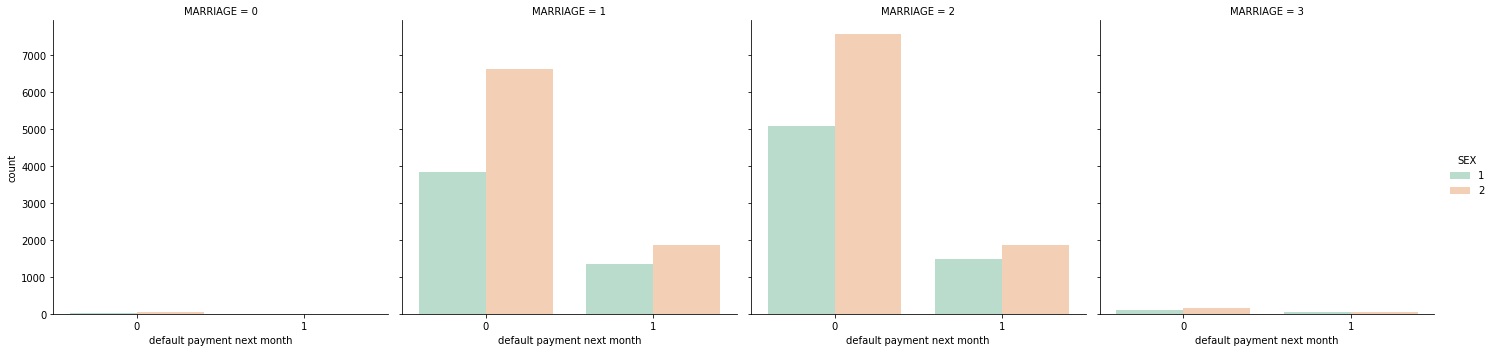

In [65]:
sns.factorplot('default payment next month', data=rawData, hue='SEX', kind='count', palette='Pastel2', hue_order=range(1,3), col= 'MARRIAGE')

Text(0.5, 1.0, 'Distribucion de Clientes por Edad')

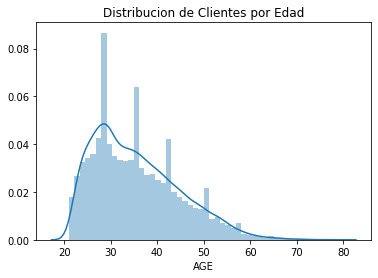

In [59]:
age_dist = sns.distplot(rawData['AGE'])
age_dist.set_title("Distribucion de Clientes por Edad")